## Assignment 6 - Deadline: Nov 23, 2025, Mon 11pm

#### DSAI 510 Fall 2025

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [4]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the display option to show all rows scrolling with a slider
# pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1: Modeling heart disease dataset with Logistic Regression, k-NN and Naive Bayes (80 pts)

Here's the heart disease dataset info:<br>

Age: age of the patient [years] <br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br>

**TASKS to be done:**

Note: Read all of the tasks first to get an idea of the process before you begin completing them.
We'll train binary classifiers to predict the target HeartDisease, which can be 0 or 1.
1) Clean the dataset (handle duplicate records, missing values etc. if any)
2) Do EDA: Create the pairplots ( we've done it before) by using `sns` package and also create the colored correlation matrix that shows correlation values between the numerical features. Make each cell include the correlation value and color it according to that value as we've done it in class.
3) Split the dataset as train, validation and test.
4) Standardize (mean=0, std=1) all numerical columns (not categorical ones!). To do this, we will learn the transformation parameters (mean and std) from the train data, then use these two parameters to transform train, validation and test datasets. Notice that we're not using the whole dataset's (train+val+test) mean and std values to standardize. This would create what's called "data leakage". You'd want to avoid using some info from val and test dataset to transform the train dataset. No information should leak to our training process from the val and test datasets as val and test datasets are considered unknown during the training phase. You can read more about this from here: https://towardsdatascience.com/the-dreaded-antagonist-data-leakage-in-machine-learning-5f08679852cc . 

The correct scaling without data leakage is shown below--but remember, you should standardize only the numerical columns, not the categorical ones or their one-hot encoded versions. So you need to substitute "columns" in the code below with positions of the numerical columns, e.g., columns = [0, 2, 4].

```
columns = [?, ?, ...]
sc = StandardScaler()
sc.fit(X_train[:, columns])  # Learn mean and std from only train set.
X_train[:, columns] = sc.transform(X_train[:, columns])
X_val[:, columns] = sc.transform(X_val[:, columns])
X_test[:, columns] = sc.transform(X_test[:, columns])
```
5) Now apply on training data (i) logistic regression, (ii) k-NN and (iii) naive Bayes. Calculate accuracy, sensitivity (recall), specificity, precision and F1 scores for each model on the validation set. Display your results in a summary table each row will include the model name and associated evaluation metrics (performance metrics) from the validation set.

6) Show the ROC curves for each model on the same plot by indicating which curve belongs to which model by using a legend (preferably, color coded). Interpret the ROC curves. Which one is the best?

7) Now you will choose the best model among the ones you used in the previous step. For each model, some performance metrics may be high but some may be low. So, you need to decide on a performance metric based on your aim before looking at these metrics' values. **Your aim here is to identify everyone with even a slight possibility of having a heart attack, as heart attacks are often fatal.** Which performance metric is the most suitable for this problem among accuracy, sensitivity (recall), specificity, precision, F1 score and ROC? There may not be a single answer; choose the one that you think is the most suitable. Explain why you choose that particular metric? Warning: Here we are deciding on the metric based on our aim mentioned above; we're not choosing a metric that has maximum value!

8) Now find among the trained models that has the maximum value of the performance metric that you chose in the previous step.

9) Now you've chosen your best predictive model, calculate its performance metric, which you chose previously, on the test dataset. You can announce to the world this test metric as your best model's predictive power.





In [27]:
heart = pd.read_csv('./heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.isna().sum() # no missing values, nice

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
len(heart[heart.duplicated()]) # no duplication in terms of rows, nice

0

In [28]:
binary_cols = ['Sex', 'FastingBS', 'ExerciseAngina']
cat_cols = heart.select_dtypes('object')
num_cols = heart.select_dtypes('number').drop('FastingBS', axis=1)

heart['Sex'] = heart['Sex'].map({'M': 1, 'F': 0})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'Y': 1, 'N': 0})

target = 'HeartDisease'

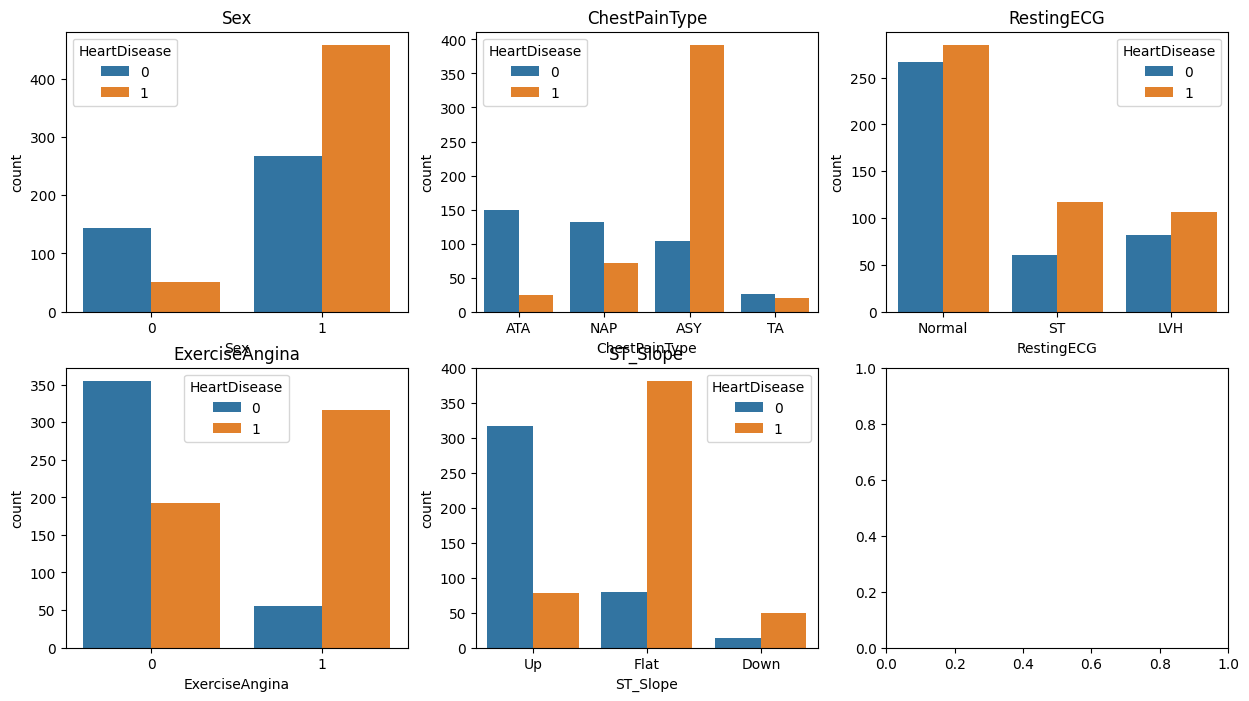

In [40]:
n_cols = len(cat_cols.columns)
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(cat_cols.columns):
    sns.countplot(data=heart, x=col, hue=target, ax=axes[idx])
    axes[idx].set_title(f'{col}')

['Sex', 'ExerciseAngina', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']


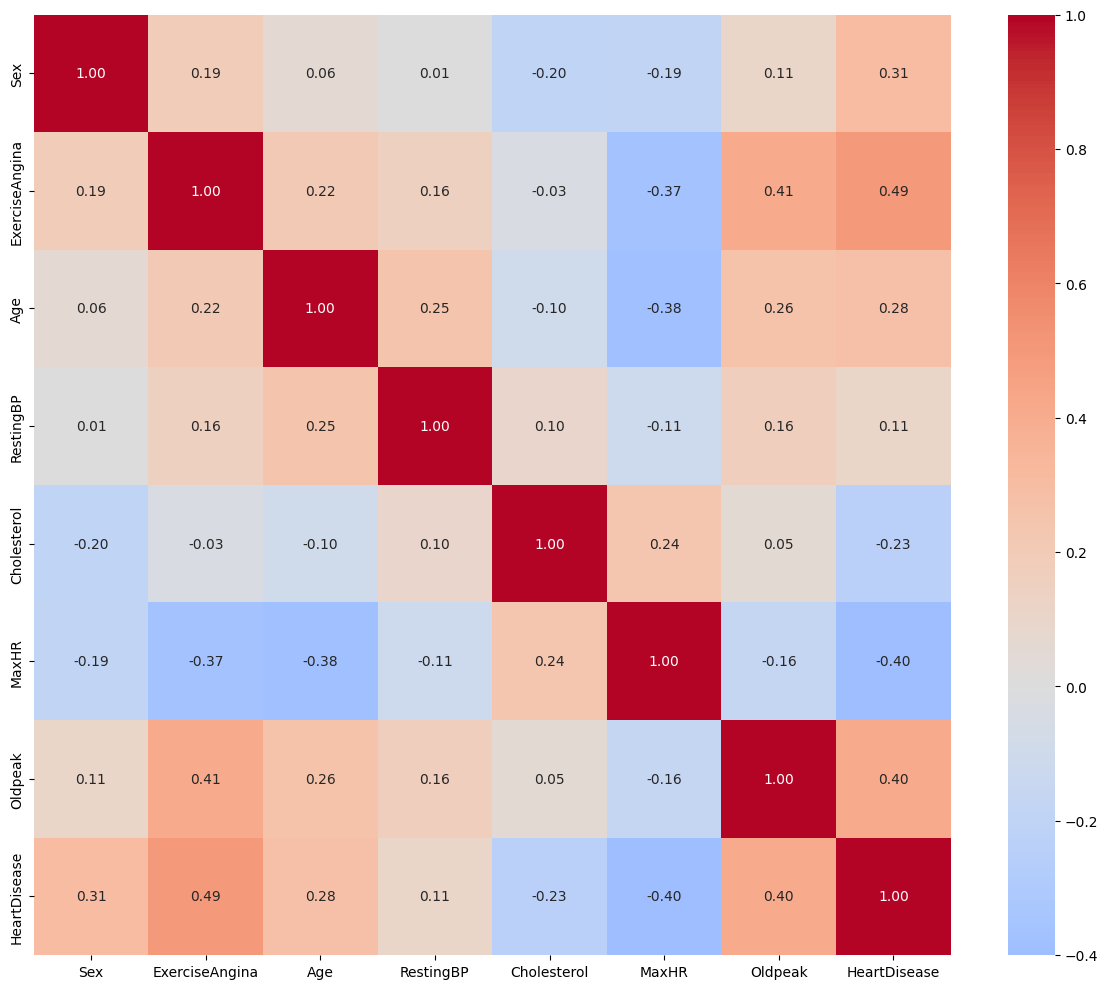

In [37]:
plot_cols = ['Sex', 'ExerciseAngina'] + num_cols.columns.tolist()
print(plot_cols)

plt.figure(figsize=(12, 10))
corr = heart[plot_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

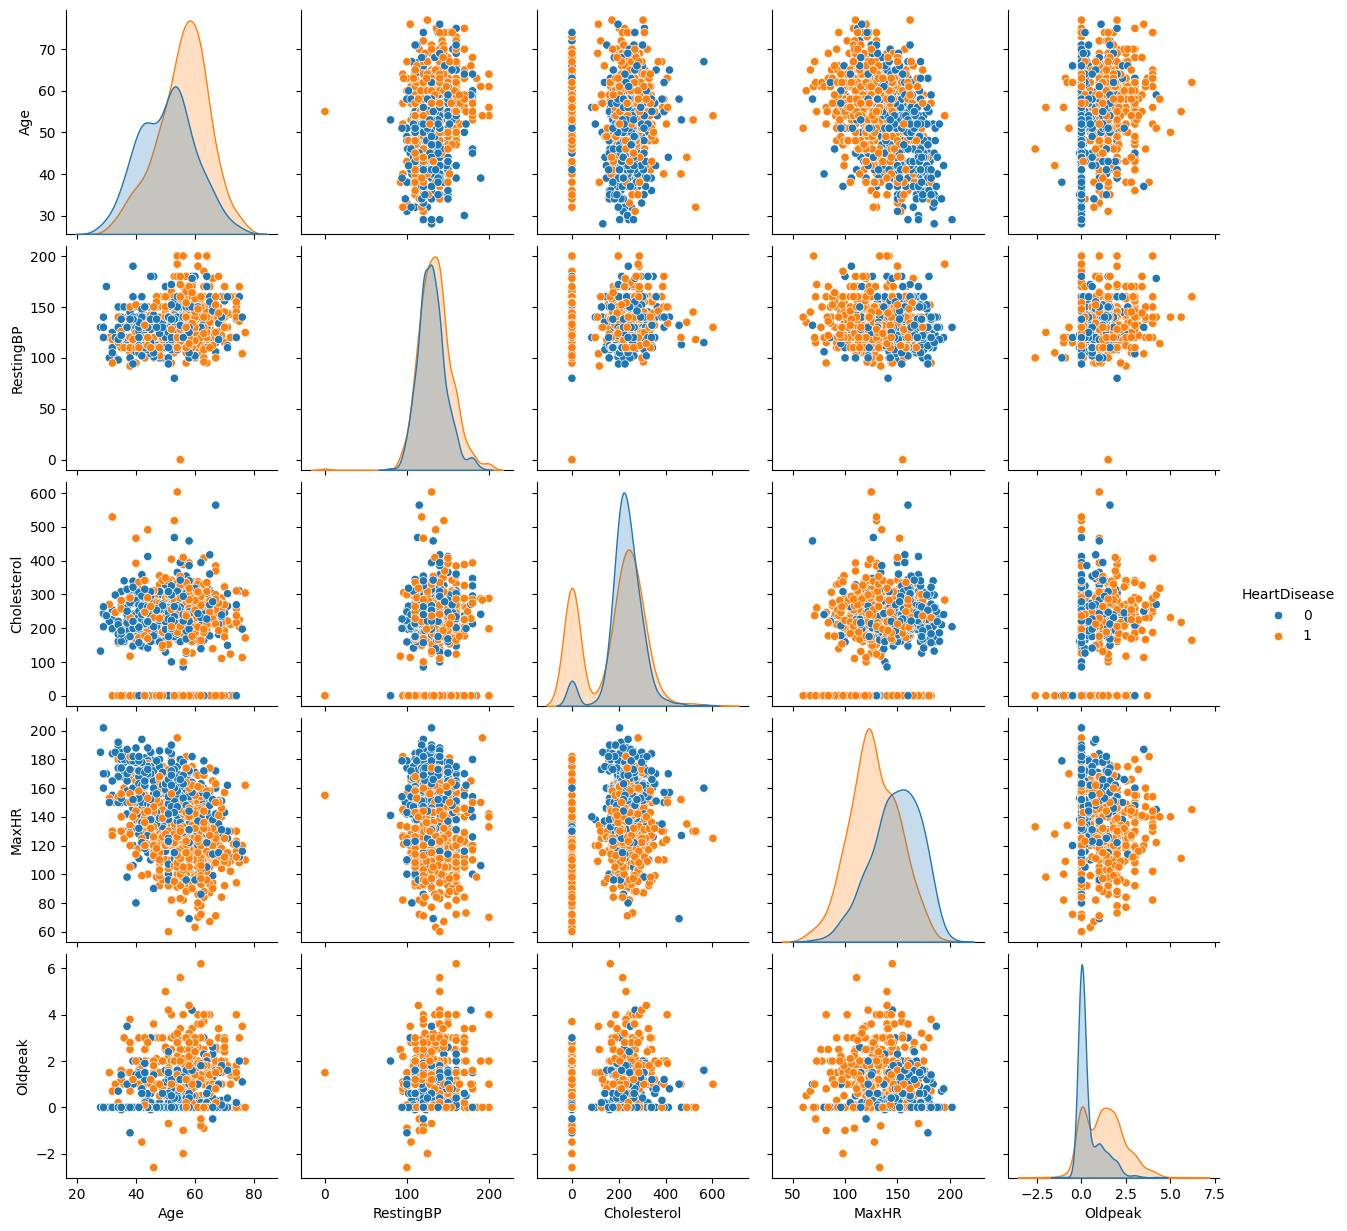

In [118]:
sns.pairplot(data=heart[num_cols.columns.tolist()], hue=target)
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

X = heart.drop(columns=[target])
y = heart[target]

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)

In [107]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# encoder = TargetEncoder(cols=cat_cols.columns)
# X_train = encoder.fit_transform(X_train, y_train)
# X_val = encoder.transform(X_val)
# X_test = encoder.transform(X_test)

X_train = pd.get_dummies(X_train, columns=cat_cols.columns, drop_first=True).astype(int)
X_val = pd.get_dummies(X_val, columns=cat_cols.columns, drop_first=True).astype(int)
X_test = pd.get_dummies(X_test, columns=cat_cols.columns, drop_first=True).astype(int)

scale_cols = num_cols.drop(target, axis=1).columns.tolist()
scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, recall_score, 
    precision_score, f1_score, confusion_matrix, 
    roc_curve, roc_auc_score, auc
)
import pandas as pd

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

fit_models = {}

val_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    fit_models[name] = model
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    val_results.append({
        'Model': name,
        'ROC-AUC': roc_auc_score(y_val, y_pred_proba),
        'Accuracy': accuracy_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Specificity': specificity,
        'F1 Score': f1_score(y_val, y_pred)
    })

val_results_df = pd.DataFrame(val_results)
print(val_results_df.to_string(index=False))

              Model  ROC-AUC  Accuracy   Recall  Precision  Specificity  F1 Score
Logistic Regression 0.914898  0.869565 0.881579   0.881579     0.854839  0.881579
               k-NN 0.907364  0.862319 0.894737   0.860759     0.822581  0.877419
        Naive Bayes 0.920628  0.876812 0.881579   0.893333     0.870968  0.887417


In [ ]:
# If our goal is to identify everyone with even a slight possibility of having a heart attack, 
# then its about how well we can distinguish Positive (heart attack) cases. If we can minimize
# False Negatives (no heart attack) then we can get closer to our goal. 

# Looking at the validation results, NB achievest the highest ROC-AUC, meaning that it is superior 
# when it comes to distinguishing classes. However, are we really investigating 0-1 results
# or do we want to measure how well our model performs for positive cases specifically?
# By definition and considering our goal, Recall will be our metric to use.

# k-NN achieves 0.894737 and outperforms other models in validation for identifying positive cases. 
# Based on this result, choosing k-NN looks like the best option despite having the lowest ROC-AUC score.

In [109]:
test_results = []
for name, model in fit_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    test_results.append({
        'Model': name,
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Specificity': specificity,
        'F1 Score': f1_score(y_test, y_pred)
    })

test_results_df = pd.DataFrame(test_results)
print(test_results_df.to_string(index=False))

              Model  ROC-AUC  Accuracy   Recall  Precision  Specificity  F1 Score
Logistic Regression 0.931027  0.891304 0.921053   0.886076     0.854839  0.903226
               k-NN 0.930284  0.884058 0.921053   0.875000     0.838710  0.897436
        Naive Bayes 0.943973  0.905797 0.894737   0.931507     0.919355  0.912752


In [ ]:
# Evaluating test set results, k-NN, our selected model, again achieves the highest Recall (0.921053) along with LR. Since test results are our final measurements,
# we can conclude that our final model is k-NN for this goal.

In [ ]:
# I also tried target encoding to see if it could increase the recall 
# but highest recall with it was 0.881579 (NB)
# By simply commenting onehot encoding and commenting out target encoding, you can redo the experiment.

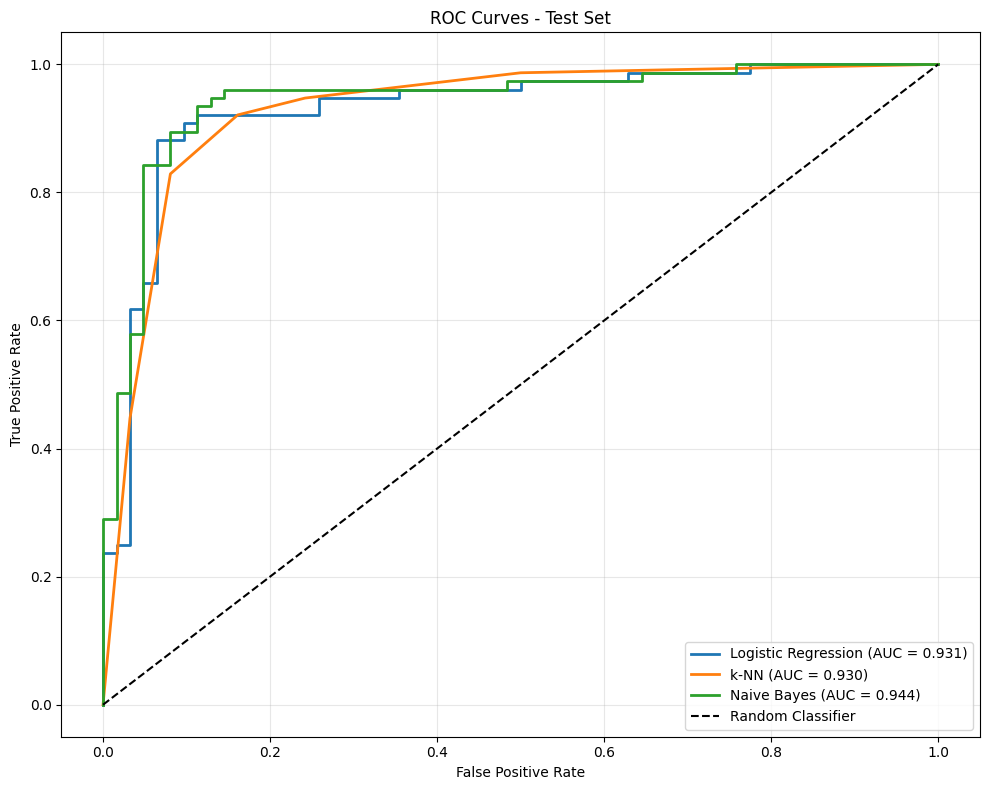

In [119]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Test Set')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Although all of the models show a strong >0.90 similar ROC-AUC score (discriminative ability), NB achieves 0.944 ROC-AUC score so it is the dominant model in this plot.
# Our k-NN achieves 0.930 ROC-AUC is an acceptable little trade-off for having better recall.

## Problem 2: Decision boundary in logistic regression (10 pts)

Let's say you trained a logistic regression model on a dataset with two features (not the heart disease dataset; this problem is independent of the one above). The parameters turn out to be $\beta_0 = 2$, $\beta_1 = -3$ and $\beta_2 = 7$. Use algebra (no coding) to find the equation of the line that defines the decision boundary.

In logistic regression, the predicted probability is given by the sigmoid function:

$$p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

Setting $p = 0.5$:

$$0.5 = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

$$1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)} = 2$$

$$e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)} = 1$$

Taking the natural log of both sides:

$$-(\beta_0 + \beta_1 x_1 + \beta_2 x_2) = \ln(1) = 0$$

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$$

Substituting the given parameters:

$$2 - 3x_1 + 7x_2 = 0$$

Solving for $x_2$ in terms of $x_1$:

$$x_2 = \frac{3}{7}x_1 - \frac{2}{7}$$

This is the equation of the decision boundary line with slope $\frac{3}{7}$ and y-intercept $-\frac{2}{7}$.
```